In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import kendalltau


In [9]:

# Load the dataset
df = pd.read_csv('C:Users/DELLUser/Downloads/temp.csv')


In [11]:
df['ANN'] = df['ANN'].fillna(df['ANN'].mean())

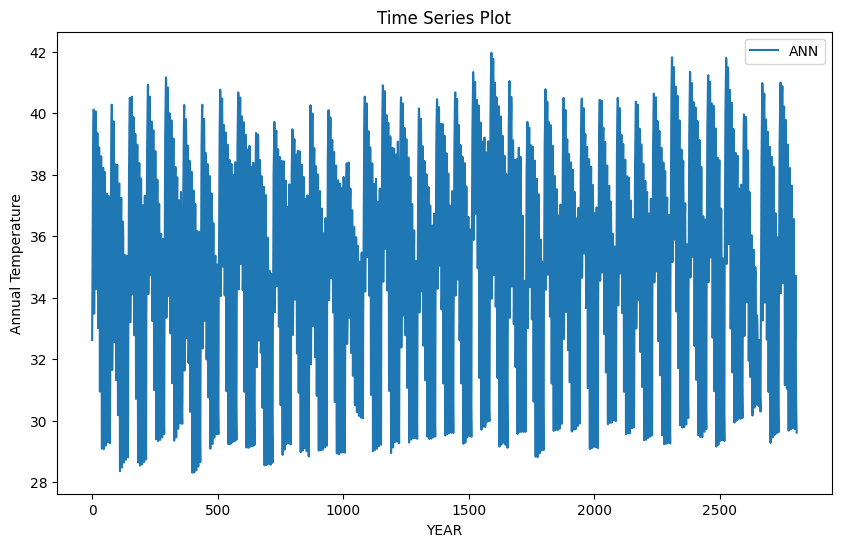

In [17]:
# Visual Exploration: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ANN'], label='ANN')
plt.title('Time Series Plot')
plt.xlabel('YEAR')
plt.ylabel('Annual Temperature')
plt.legend()
plt.savefig('time_series_plot.png')
plt.show()

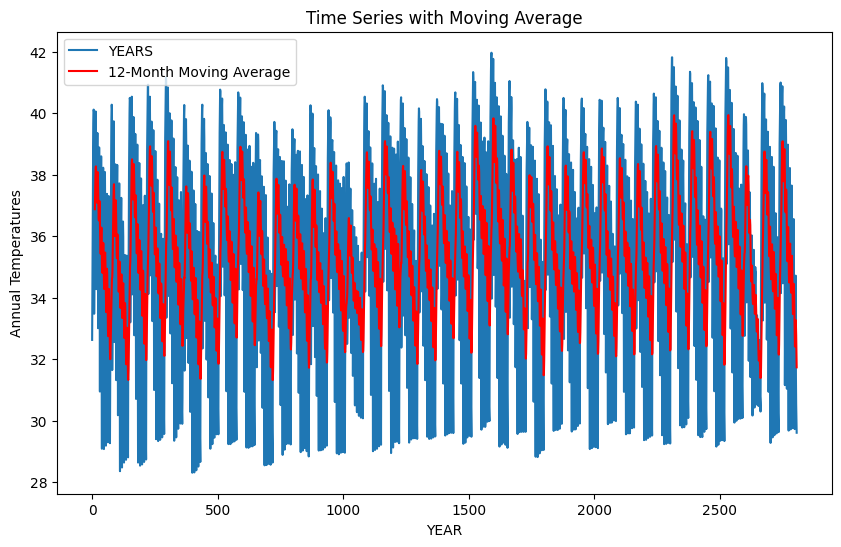

In [24]:
# Moving Averages: Calculate and plot the 12-month moving average
df['Moving_Average'] = df['ANN'].rolling(window=12).mean()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ANN'], label='YEARS')
plt.plot(df.index, df['Moving_Average'], label='12-Month Moving Average', color='red')
plt.title('Time Series with Moving Average')
plt.xlabel('YEAR')
plt.ylabel('Annual Temperatures')
plt.legend()
plt.savefig('moving_average_plot.png')
plt.show()


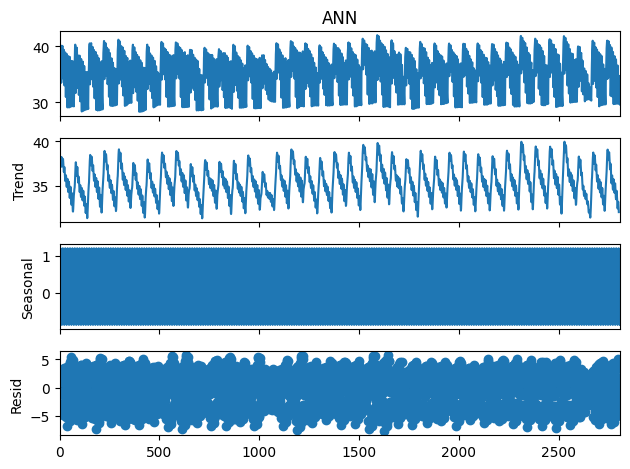

In [19]:
# Seasonal Decomposition
result = seasonal_decompose(df['ANN'], model='additive', period=12)
result.plot()
plt.savefig('seasonal_decomposition.png')
plt.show()


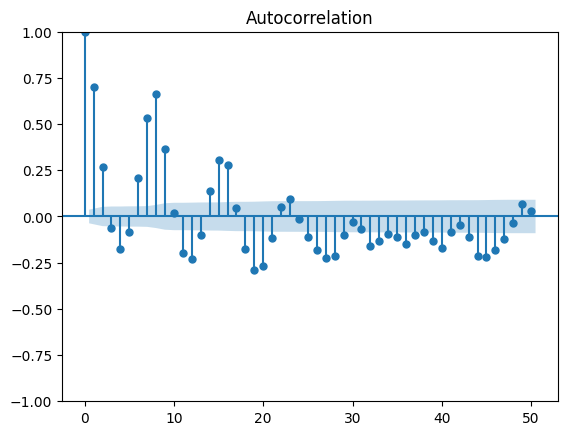

In [20]:
# Autocorrelation
plot_acf(df['ANN'].dropna(), lags=50)
plt.savefig('autocorrelation.png')
plt.show()


In [22]:
# Non-parametric Tests: Kendall Tau correlation

df['JAN'] = np.random.rand(len(df))  # Dummy data for illustration
tau, p_value = kendalltau(df['JAN'], df['JAN'])
with open('kendalltau_test.txt', 'w') as f:
    f.write(f'Kendall Tau correlation: {tau}\n')
    f.write(f'P-value: {p_value}\n')
plt.show()

print("Script execution completed. Check the files for outputs.")


Script execution completed. Check the files for outputs.
